# COMP3010J-Machine Learning Project

## Topic Chosen: Rain In Australia

### - Student Name: Gao Ruihan
### - Student Number: 19206227 

# 1. Preparation Work

## 1.1 Import libraries

Firstly loading all libraries used in this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PolynomialFeatures

## 1.2 Import & Preview Dataset

In [2]:
weather_data=pd.read_csv("weatherAUS.csv")
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## 1.3 View the Statistical Properties

In [3]:
weather_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## 1.4 View the Overall Information

In [4]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## 1.5 Feature Transformation

Since we're dealing with a binary classfication problem, so firstly convert "yes" and "no" of text to 1 and 0 respectively.

In [5]:
weather_data['RainToday'].replace({'No':0, 'Yes':1},inplace=True)
weather_data['RainTomorrow'].replace({'No':0, 'Yes':1},inplace=True)

## 1.6 Handling Class Imbalance

In the following, we check whether the dataset in imbalanced or not.

### 1.6.1 RainTomorrow Indicator in the Imbalanced Dataset

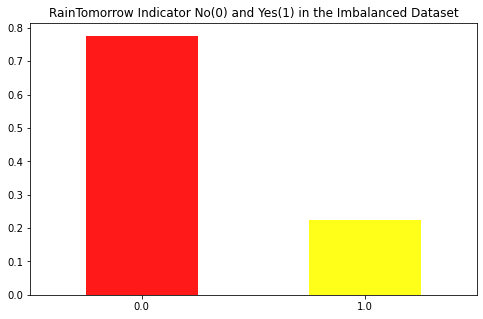

In [6]:
fig = plt.figure(figsize = (8,5))
weather_data['RainTomorrow'].value_counts(normalize = True).plot(kind='bar', color= ['red','yellow'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

It can be seen from the above figure that there is a serious data skew in the data, which will lead to slow convergence of the training process and affect the training effect. Therefore, we use the random sampling method to solve the data skew problem.

### 1.6.2 RainTomorrow Indicator After Oversampling

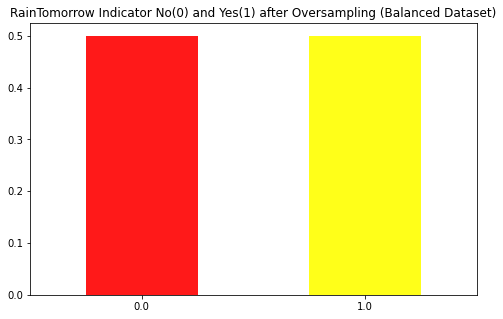

In [7]:
from sklearn.utils import resample

no = weather_data[weather_data['RainTomorrow'] == 0]
yes = weather_data[weather_data['RainTomorrow']== 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
weather_data = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
weather_data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['red','yellow'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

##  1.7 Data Quality Reports

Checking missing values.

In [8]:
weather_data.isnull().sum()

Date                  0
Location              0
MinTemp            1082
MaxTemp             471
Rainfall           3124
Evaporation       95411
Sunshine         104831
WindGustDir       15491
WindGustSpeed     15354
WindDir9am        14728
WindDir3pm         6440
WindSpeed9am       2206
WindSpeed3pm       4353
Humidity9am        3171
Humidity3pm        6031
Pressure9am       21728
Pressure3pm       21746
Cloud9am          81339
Cloud3pm          85614
Temp9am            1653
Temp3pm            4558
RainToday          3124
RainTomorrow          0
dtype: int64

Here I calculated the percent of missing values in categorical variables and selected the top five ones.

In [9]:
total = weather_data.isnull().sum().sort_values(ascending=False)
percent = (weather_data.isnull().sum()/weather_data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(5)

,Total,Percent
Sunshine,104831,0.475140
Evaporation,95411,0.432444
Cloud3pm,85614,0.388040
Cloud9am,81339,0.368664
Pressure3pm,21746,0.098562


As shown in the data quality reports, the overrall quality of the data is not very good. Thus, the next step is to do data cleaning.
# 2. Data Cleaning, Analysis and Feature Selection
## 2.1 Data Removing
The features with a missing rate of more than 30% can be removed.

From above table, "Sunshine", "Evaporation", "Cloud3pm", "Cloud9am"features which has missing rage of 47.51%, 43.24%, 38.80% and 36.87% respectively can be removed.

In [10]:
weather_data.drop(["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"], inplace=True, axis=1)

In [1]:
weather_data.info()

NameError: name 'weather_data' is not defined

## 2.2 Missing Data Imputing 

The features with a missing rate of less than 30% can be imputed.  
- For feature which has 'object' data type, we fill in missing values with mode.  
- For feature which has 'float' data type, we fill in missing values by multiple imputation methods.

In [12]:
for column in weather_data.select_dtypes(include=['object']).columns:
    weather_data[column]=weather_data[column].fillna(weather_data[column].mode()[0])

In [13]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for column in weather_data.select_dtypes(include=['object']).columns:
    lencoders[column] = LabelEncoder()
    weather_data[column] = lencoders[column].fit_transform(weather_data[column])

In [14]:
mice_imputer = IterativeImputer()
weather_data.iloc[:, :] = mice_imputer.fit_transform(weather_data)

In [15]:
weather_data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### 2.2.1 IQR Rule - Identify & Remove Outliers 

Here I'm using IQR method to identify outliers. We adopt 1.5 times IQR as the standard, and stipulate that the point exceeding (upper quartile +1.5 times IQR distance, or lower quartile -1.5 times IQR distance) is the outlier.

In [16]:
# Remove outliers
Q1 = weather_data.quantile(0.25)
Q3 = weather_data.quantile(0.75)
IQR = Q3 - Q1
MiceImputed = weather_data[~((weather_data < (Q1 - 1.5 * IQR)) |(weather_data > (Q3 + 1.5 * IQR))).any(axis=1)]

## 2.3 Feature Selecting and Creating
### 2.3.1 Feature Selecting - HeatMap

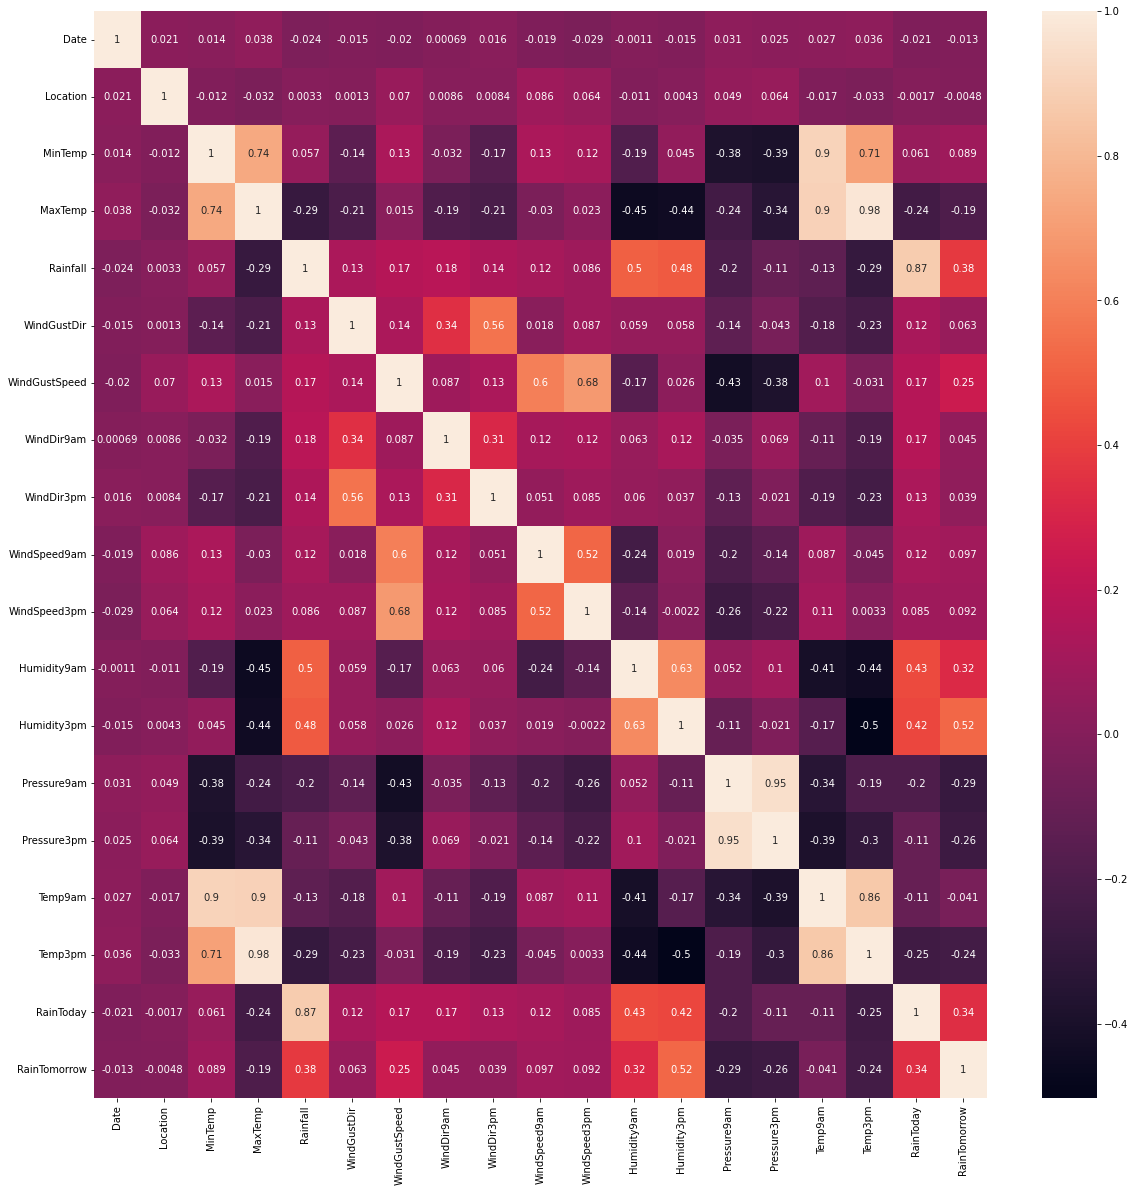

In [17]:
corrmat = weather_data.corr(method = "spearman")
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmat,annot=True)

From the above correlation matrix thermodynamic diagram, the correlation coefficient between the 'Date' and 'Location' features and the target is very small, indicating that these two features are not related to the target value, so we give up these two features and choose other features as the feature values.

In [18]:
feature=weather_data.iloc[:,2:-1]
target=weather_data.iloc[:,-1]
feature.head(5)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0
1,7.4,25.1,0.0,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0
2,12.9,25.7,0.0,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0
3,9.2,28.0,0.0,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0
4,17.5,32.3,1.0,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0


According to the correlation heatmap, Date and Location are not related to RainTomorrow, and other attributes are related to RainTomorrow to a certain extent, so attributes except locatin and date are selected as features.

### 2.3.2 Create New Features

According to the correlation heatmap：  
- MinTemp, MaxTemp, Temp9am, Temp3pm are related.  
- WindGustDir, WindDir9am, WindDir3pm are related.  
- WindGustSpeed, WindSpeed9am, WindSpeed3pm are related.  
- Humidity3pm, Humidity9am are related.  
- Pressure9am, Pressure3pm are related.  

So create five new features from these five groups of data by PolynomialFeatures method from sklearn.

In [19]:
poly=PolynomialFeatures(2)
feature['Temp']=poly.fit_transform(feature[['MinTemp','MaxTemp','Temp9am','Temp3pm']]).sum(axis=1)
feature['WindDir']=poly.fit_transform(feature[['WindGustDir','WindDir9am','WindDir3pm']]).sum(axis=1)
feature['WindSpeed']=poly.fit_transform(feature[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']]).sum(axis=1)
feature['Humidity']=poly.fit_transform(feature[['Humidity9am','Humidity3pm']]).sum(axis=1)
feature['Pressure']=poly.fit_transform(feature[['Pressure9am','Pressure3pm']]).sum(axis=1)

In [20]:
feature.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Temp,WindDir,WindSpeed,Humidity,Pressure
0,13.4,22.9,0.6,13.0,44.0,13.0,14.0,20.0,24.0,71.0,...,1007.7,1007.1,16.9,21.8,0.0,3620.91,1108.0,5417.0,7181.0,3046580.17
1,7.4,25.1,0.0,14.0,44.0,6.0,15.0,4.0,22.0,44.0,...,1010.6,1007.8,17.2,24.3,0.0,3598.55,877.0,3739.0,3731.0,3057475.28
2,12.9,25.7,0.0,15.0,46.0,13.0,15.0,19.0,26.0,38.0,...,1007.6,1008.7,21.0,23.2,0.0,4414.79,1278.0,5809.0,3553.0,3051116.87
3,9.2,28.0,0.0,4.0,24.0,9.0,0.0,11.0,9.0,45.0,...,1017.6,1012.8,18.1,26.5,0.0,4377.67,147.0,1402.0,3063.0,3093930.28
4,17.5,32.3,1.0,13.0,41.0,1.0,7.0,7.0,20.0,82.0,...,1010.8,1006.0,17.8,29.7,0.0,6106.18,352.0,3446.0,10635.0,3052635.24


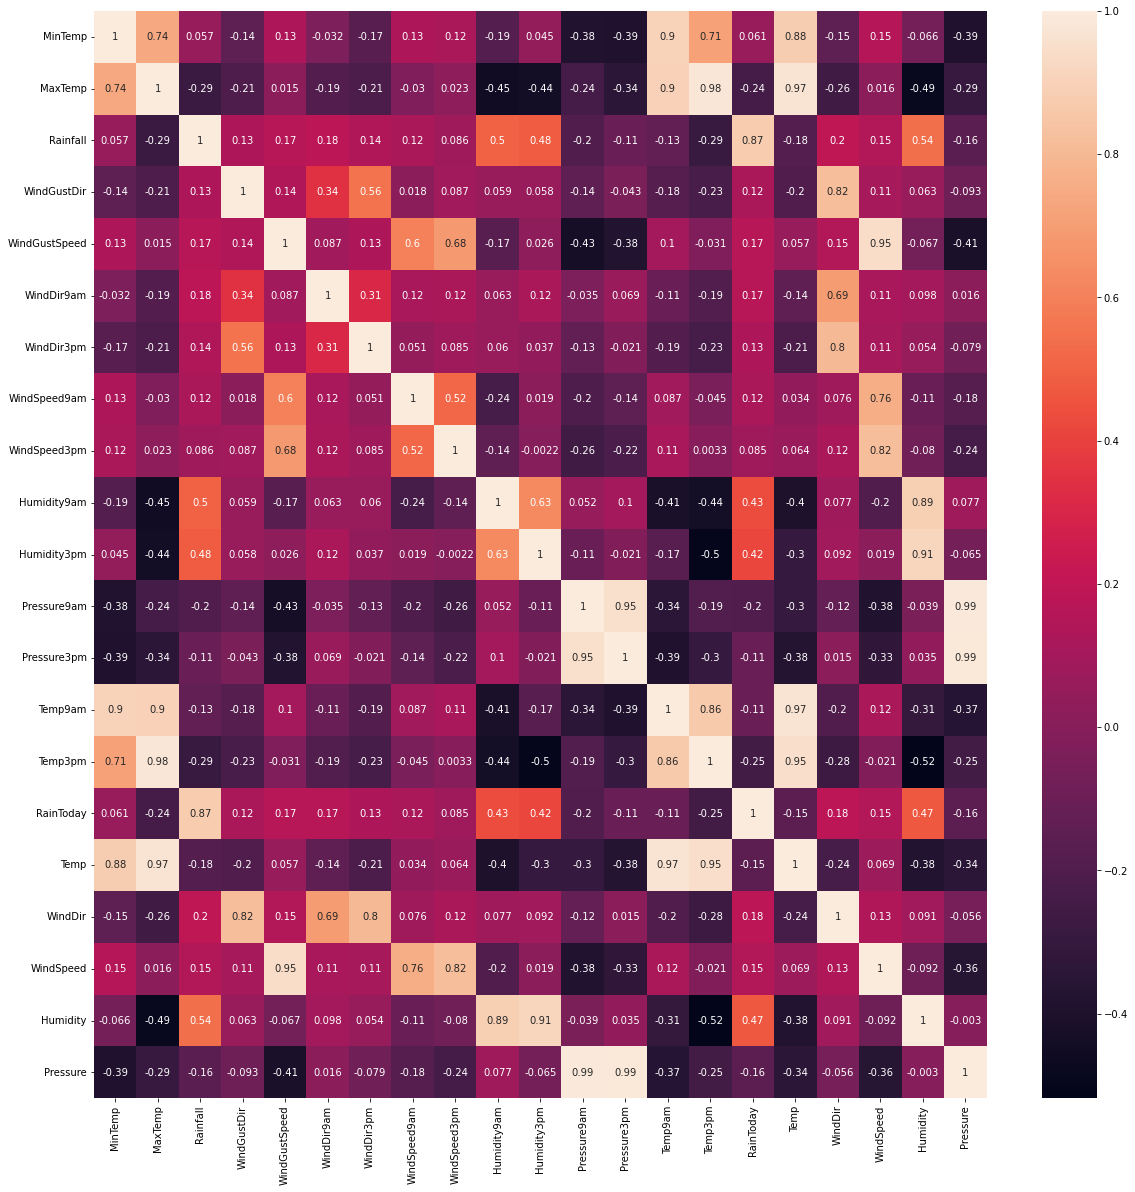

In [21]:
corrmat = feature.corr(method = "spearman")
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmat,annot=True)

# 3. Model Training Using Different Data Set Partition Methods & Different Hyperparameter Values
## 3.1 Data Standard Scale
Standardizing the data before model training to eliminate the influence of different dimensions can make the model training process converge better.

In [22]:
# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature= scaler.fit_transform(feature)
feature[0:5,:]

array([[ 0.13751001,  0.06265123, -0.27864912,  1.02933277,  0.14680494,
         1.31349201,  1.30930574,  0.59755506,  0.53019995, -0.06425313,
        -1.6418789 , -1.25834143, -1.02919671,  0.01166575,  0.14289112,
        -0.67499769, -0.07763045,  1.8401462 ,  0.20438364, -0.98853221,
        -1.15608134],
       [-0.80217893,  0.37205744, -0.33289172,  1.24470886,  0.14680494,
        -0.245862  ,  1.52747211, -1.14922694,  0.31183616, -1.51867768,
        -1.50399831, -0.84601757, -0.92872476,  0.05799476,  0.50079466,
        -0.67499769, -0.08674377,  1.16781057, -0.26902883, -1.49394017,
        -0.89783022],
       [ 0.05920259,  0.45644095, -0.33289172,  1.46008495,  0.28485554,
         1.31349201,  1.52747211,  0.48838118,  0.74856374, -1.84188314,
        -1.27419732, -1.27255949, -0.79954654,  0.64482898,  0.34331711,
        -0.67499769,  0.24593337,  2.33493866,  0.31497821, -1.52001629,
        -1.04854614],
       [-0.52027225,  0.77991108, -0.33289172, -0.90905203

## 3.2 Partition Dataset - Using Holdout Method

Three data sets are divided by hold-out method, including training set, verification set and test set, with the proportions of 
- 7:2:1
- 8:1:1 
- 6:2:2 

The training set is used to train the model, that is, to determine the weight and bias of the model. Usually, we call these parameters learning parameters.  

The validation set is used for model selection, and does not participate in the determination of learning parameters. The validation set is only used to select hyperparameters.  

The testing set is only used once, that is, when evaluating the final model after training. It is not involved in the process of learning parameters, nor in the process of heperparameters selection, but only used for model evaluation.

In [23]:
# Splitding Data
# 3 groups 
from sklearn.model_selection import train_test_split

proportions=['7:2:1','8:1:1','6:2:2']
X_train_val_test=[]
y_train_val_test=[]
#7:2:1
X_trainval1, X_test1, y_trainval1, y_test1 = train_test_split(feature, target, test_size=0.1, random_state=12345)
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_trainval1, y_trainval1, test_size=0.222, random_state=12345)
X_train_val_test.append((X_train1,X_val1,X_test1))
y_train_val_test.append((y_train1,y_val1,y_test1))
#8:1:1
X_trainval2, X_test2, y_trainval2, y_test2 = train_test_split(feature, target, test_size=0.1, random_state=12345)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_trainval2, y_trainval2, test_size=0.111, random_state=12345)
X_train_val_test.append((X_train2,X_val2,X_test2))
y_train_val_test.append((y_train2,y_val2,y_test2))
#6:2:2
X_trainval3, X_test3, y_trainval3, y_test3 = train_test_split(feature, target, test_size=0.2, random_state=12345)
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_trainval3, y_trainval3, test_size=0.25, random_state=12345)
X_train_val_test.append((X_train3,X_val3,X_test3))
y_train_val_test.append((y_train3,y_val3,y_test3))

## 3.3 Different Models Training & Analysis
In this step, we trained two models and two ensembles, namely,
- Logistic Regression
- Decision Tree
- Random Forest 
- XGBoost

The training of each model has tried different data set partition methods and different hyperparameter values, and compared them in the way of line graph.

In [24]:
models={}
color = ['red', 'green', 'orange']


The models list stores the best performing models for each algorithm. The color list corresponds to three data partitioning methods, which are used in plotting.

### 3.3.1 Logistic Regression
In the logistic regression algorithm, we try to take four different values of the hyperparameter "c": 
- 0.01
- 0.1
- 1
- 10

and combine them with three data division methods to obtain a series of results, which are shown in the figure.

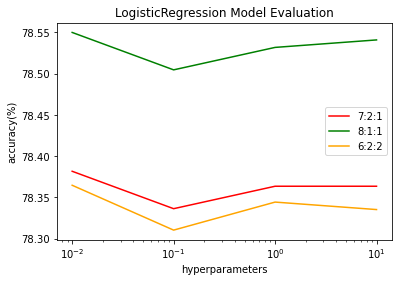

best dataset partition: 8:1:1
best hyperparameter: 0.01
best accuracy: 0.7855004083114056


In [25]:
from sklearn.linear_model import LogisticRegression

cs=[0.01,0.1,1,10]# hyperparameters
best_model_lr=None
best_proportion=None
best_c=None
best_score=0
fig, axes = plt.subplots()
for i in range(3):#dataset
    scores=[]
    for c in cs:
        model_lr=LogisticRegression(penalty='l2',C=c,solver='liblinear')
        model_lr.fit(X_train_val_test[i][0],y_train_val_test[i][0])  
        model_score=model_lr.score(X_train_val_test[i][1],y_train_val_test[i][1])
        scores.append(model_score*100)
        if model_score>best_score:
            best_score=model_score
            best_model_lr=model_lr
            best_proportion=proportions[i]
            best_c=c
    axes.semilogx(cs,scores,c=color[i],label=proportions[i])
axes.set_xlabel("hyperparameters")
axes.set_ylabel("accuracy(%)")
plt.title("LogisticRegression Model Evaluation")
plt.legend(loc='best');
plt.show();
models['LogisticRegression']=best_model_lr
print("best dataset partition:",best_proportion)
print("best hyperparameter:",best_c)
print("best accuracy:",best_score)

# accuracy_lr, roc_auc_lr = run_model(best_model_lr, X_train_val_test[i][2],y_train_val_test[i][2])

##### Analysis
It can be seen from the above figure that the performance of the three data set partitioning methods is quite different, of which 8:1:1 is the best and 6:2:2 is the worst. The hyperparameters of the optimal model are different under different data set partition methods.  Among them, the optimal hyperparameter is 0.01 under the 8:1:1 dataset partition mode (the best performance).

### 3.3.2 Decision Tree
In the decision tree algorithm, we try to take five different values of the hyperparameter "max_depth": 
- 4
- 8
- 12
- 16
- 20

and combine them with three data division methods to obtain a series of results, which are shown in the figure.

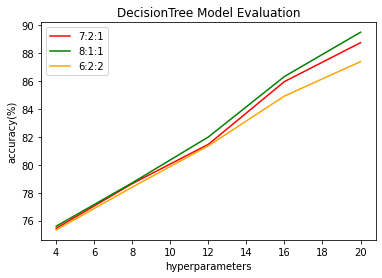

best dataset partition: 8:1:1
best hyperparameter: 20
best accuracy: 0.89515470465475


In [26]:
from sklearn.tree import DecisionTreeClassifier

max_depths=[4,8,12,16,20]

best_model_dtc=None
best_proportion=None
best_max_depth=None
best_score=0
fig, axes = plt.subplots()
for i in range(3):#dataset
    scores=[]
    for max_depth in max_depths:
        model_dtc=DecisionTreeClassifier(max_depth=max_depth)
        model_dtc.fit(X_train_val_test[i][0],y_train_val_test[i][0])  
        model_score=model_dtc.score(X_train_val_test[i][1],y_train_val_test[i][1])
        scores.append(model_score*100)
        if model_score>best_score:
            best_score=model_score
            best_model_dtc=model_dtc
            best_proportion=proportions[i]
            best_max_depth=max_depth
    axes.plot(max_depths,scores,c=color[i],label=proportions[i])
axes.set_xlabel("hyperparameters")
axes.set_ylabel("accuracy(%)")
plt.title("DecisionTree Model Evaluation")
plt.legend(loc='best');
plt.show();
models['DecisionTree']=best_model_dtc
print("best dataset partition:",best_proportion)
print("best hyperparameter:",best_max_depth)
print("best accuracy:",best_score)

##### Analysis
As can be seen from the above figure, the differences between the three data set partitioning methods become more and more obvious with the change of hyperparameters, of which 8:1:1 is the best and 6:2:2 is the worst. The super parameters of the optimal model are different under different data set partition methods. Among them, under the 8:1:1 dataset partition mode (the best performance), the optimal super parameter is 20.

### 3.3.3 Random Forest
In the rndom forest algorithm, we try to take four different values of the hyperparameter "n_estimators": 
- 50
- 100
- 150
- 200

and combine them with three data division methods to obtain a series of results, which are shown in the figure.

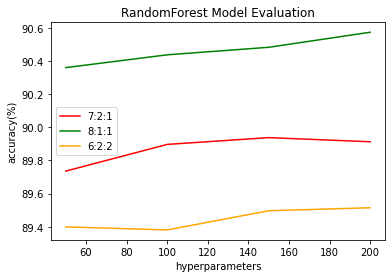

best dataset partition: 8:1:1
best hyperparameter: 200
best accuracy: 0.9057254332637692


In [27]:
from sklearn.ensemble import RandomForestClassifier

n_estimatorses=[50,100,150,200]


best_model_rfc=None
best_proportion=None
best_n_estimators=None
best_score=0
fig, axes = plt.subplots()
for i in range(3):#dataset
    scores=[]
    for n_estimators in n_estimatorses:
        model_rfc=RandomForestClassifier(n_estimators=n_estimators,max_depth=16, random_state=12345)
        model_rfc.fit(X_train_val_test[i][0],y_train_val_test[i][0])  
        model_score=model_rfc.score(X_train_val_test[i][1],y_train_val_test[i][1])
        scores.append(model_score*100)
        if model_score>best_score:
            best_score=model_score
            best_model_rfc=model_rfc
            best_proportion=proportions[i]
            best_n_estimators=n_estimators
    axes.plot(n_estimatorses,scores,c=color[i],label=proportions[i])
axes.set_xlabel("hyperparameters")
axes.set_ylabel("accuracy(%)")
plt.title("RandomForest Model Evaluation")
plt.legend(loc='best');
plt.show();
models['RandomForest']=best_model_rfc
print("best dataset partition:",best_proportion)
print("best hyperparameter:",best_n_estimators)
print("best accuracy:",best_score)

##### Analysis
It can be seen from the above figure that the performance of the three data set partitioning methods is quite different, of which 8:1:1 is the best and 6:2:2 is the worst. The hyperparameters of the optimal model are different under different data set partition methods. Among them, the optimal hyperparameter is 200 under the 8:1:1 dataset partition mode (the best performance).

### 3.3.4 XGBoost
In the xgboost algorithm, we try to take four different values of the hyperparameter "n_estimators":
- 50
- 100
- 150
- 200

and combine them with three data division methods to obtain a series of results, which are shown in the figure.

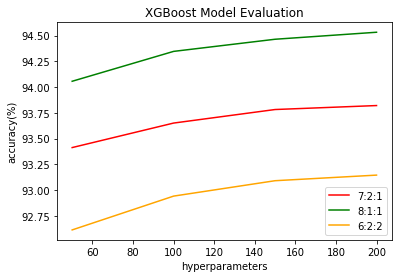

best dataset partition: 8:1:1
best hyperparameter: 200
best accuracy: 0.9453316395971327


In [28]:
import xgboost as xgb
n_estimatorses=[50,100,150,200]
best_model_xgb=None
best_proportion=None
best_n_estimators=None
best_score=0
fig, axes = plt.subplots()
for i in range(3):#dataset
    scores=[]
    for n_estimators in n_estimatorses:
        model_xgb= xgb.XGBClassifier(n_estimators=n_estimators,max_depth=16)
        model_xgb.fit(X_train_val_test[i][0],y_train_val_test[i][0])  
        model_score=model_xgb.score(X_train_val_test[i][1],y_train_val_test[i][1])
        scores.append(model_score*100)
        if model_score>best_score:
            best_score=model_score
            best_model_xgb=model_xgb
            best_proportion=proportions[i]
            best_n_estimators=n_estimators
    axes.plot(n_estimatorses,scores,c=color[i],label=proportions[i])
axes.set_xlabel("hyperparameters")
axes.set_ylabel("accuracy(%)")
plt.title("XGBoost Model Evaluation")
plt.legend(loc='best');
plt.show();
models['XGBoost']=best_model_xgb
print("best dataset partition:",best_proportion)
print("best hyperparameter:",best_n_estimators)
print("best accuracy:",best_score)

##### Analysis
It can be seen from the above figure that the performance of the three data set partitioning methods is quite different, of which 8:1:1 is the best and 6:2:2 is the worst. The hyperparameters of the optimal model are different under different data set partition methods. Among them, the optimal hyperparameter is 150 under the 8:1:1 dataset partition mode (the best performance).

# 4. Model (Ensemble) Evaluation, Comparison and Conclusion
In this part, we comprehensively evaluated the above four models, including:
- Precision 
- Recall
- F1 Score
- Accuracy
- ROC Area Under Curve (AUC)
- Macro Avg
- Weighted Avg

And four ROC curves of them are displayed on one chart for comparison. 

Finally, the accuracy of the four models and the histogram of AUC value are respectively made. According to the graph, the best model is analyzed and the final model selection is made.

## 4.1 Precision, Recall, F1 Score, Accuracy, AUC,  Macro Avg, Weighted Avg & ROC Curves of Four Models

In [29]:
def plot_roc_cur(ax, model_name, fper, tper):  
    ax.plot(fper, tper, color='orange', label='ROC')
    ax.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic (ROC) Curve: ' + model_name)
    ax.legend()

In [30]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, ax, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print(classification_report(y_test,y_pred,digits=5))  
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(ax, model_name, fper, tper)    
    return accuracy, roc_auc

LogisticRegression
Accuracy = 0.7852788542162394
ROC Area under Curve = 0.7853647427901669
              precision    recall  f1-score   support

         0.0    0.77152   0.80833   0.78950     21981
         1.0    0.80030   0.76240   0.78089     22146

    accuracy                        0.78528     44127
   macro avg    0.78591   0.78536   0.78519     44127
weighted avg    0.78596   0.78528   0.78518     44127


DecisionTree
Accuracy = 0.934371246629048
ROC Area under Curve = 0.9342362725740665
              precision    recall  f1-score   support

         0.0    0.96779   0.89814   0.93167     21981
         1.0    0.90564   0.97033   0.93687     22146

    accuracy                        0.93437     44127
   macro avg    0.93672   0.93424   0.93427     44127
weighted avg    0.93660   0.93437   0.93428     44127


RandomForest
Accuracy = 0.933034196750289
ROC Area under Curve = 0.9329838578479227
              precision    recall  f1-score   support

         0.0    0.94457   0.91

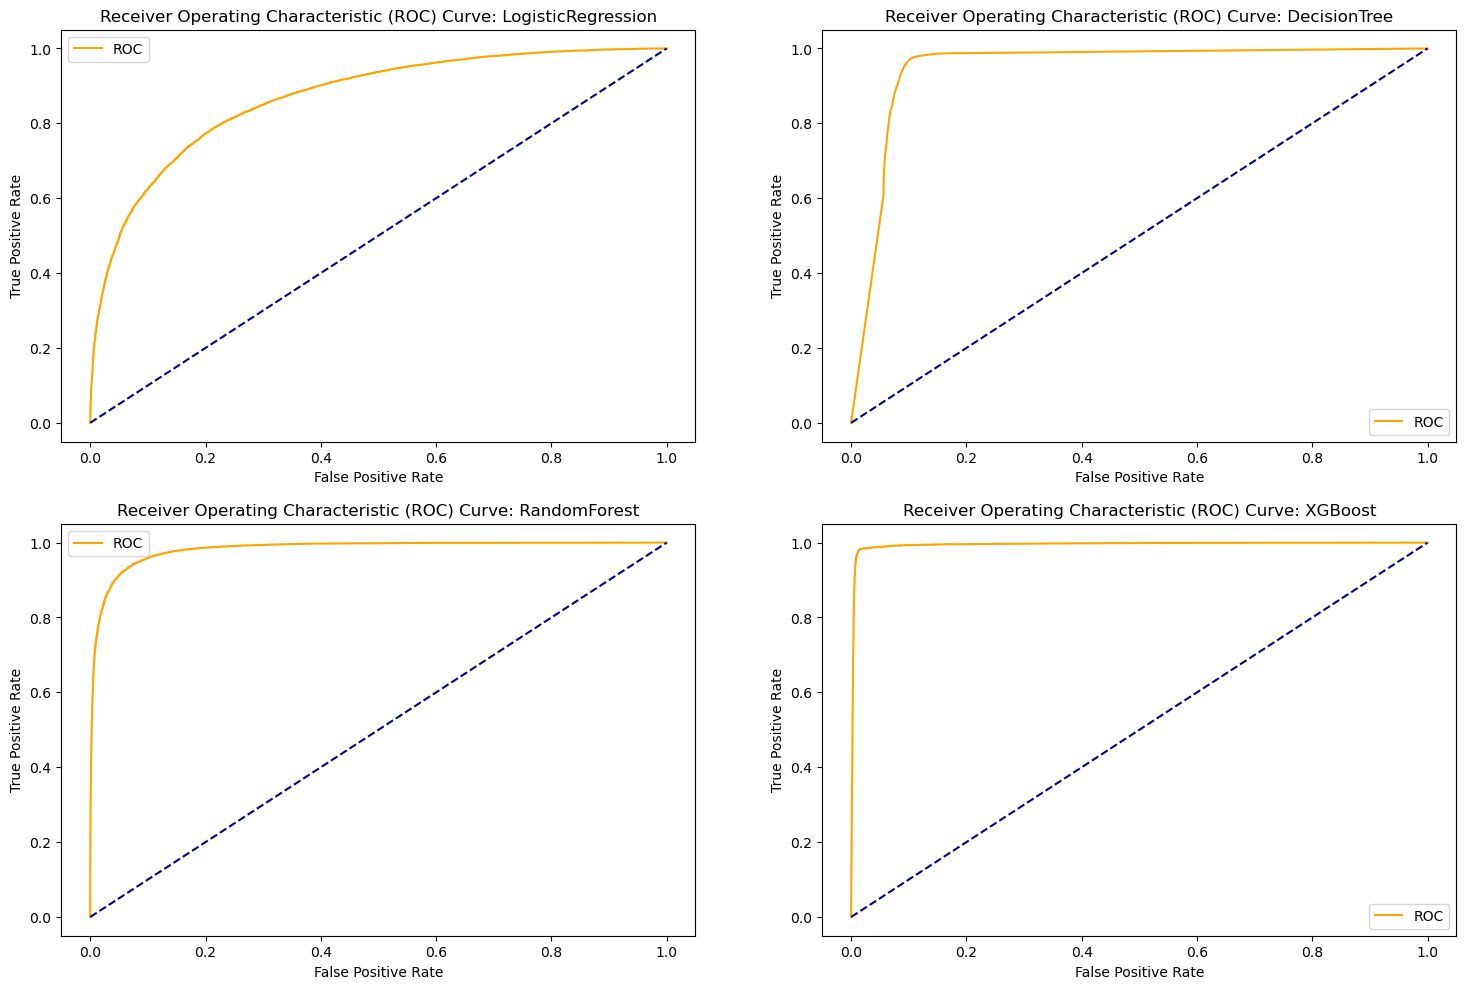

In [31]:
model_names=list(models.keys())
accuracy_scores=[]
roc_auc_scores=[]
figure ,axes =plt.subplots(2,2,figsize=(18,12),dpi=100)
ax = axes.flatten()
for i,model_name in enumerate(model_names):
    print(model_name)
    accuracy, roc_auc = run_model(models[model_name],ax[i], model_name, X_train_val_test[2][2],y_train_val_test[2][2])
    accuracy_scores.append(accuracy)
    roc_auc_scores.append(roc_auc)
    print()
plt.show()

## 4.2 Histograms of Accuracy & AUC Value of Four Models

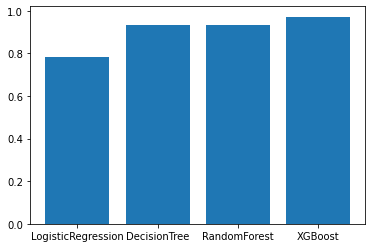

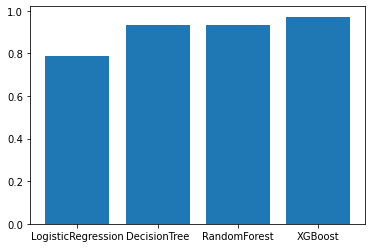

In [32]:
#Comparsion of Accuracy
plt.figure()
plt.bar(model_names,accuracy_scores)
plt.show()

#Comparsion of AUC Valus
plt.figure()
plt.bar(model_names,roc_auc_scores)
plt.show()

### 4.1 Analysis
- According to the ROC curve, the area under the XGBoost curve is the largest, and the shape is ideal. The Random Forest curve is also good, while the Losgistic Regenerator and Decision Tree perform poorly. 
- From the histogram, XGBoost performs the best in terms of accuracy and auc on the test set. Therefore, after comprehensive consideration, XGBoost model is finally selected.